In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from transformers import pipeline
import nltk
from nltk import sent_tokenize #It seperate text to multiple sentences
import torch
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Model

In [4]:
model_name="facebook/bart-large-mnli"
device=0 if torch.cuda.is_available() else "cpu"

#Function to Load Model

In [5]:
def load_model(device):
  theme_classifier=pipeline(
      "zero-shot-classification",
      model=model_name,
      device=device
    )

  return theme_classifier

In [6]:
theme_classifier=load_model(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
theme_list=["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [8]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121254086494446,
  0.47500181198120117,
  0.0878182053565979,
  0.045000456273555756,
  0.020132921636104584,
  0.012040475383400917,
  0.0042923809960484505,
  0.002817221451550722]}

# Load Dataset

In [9]:
files=glob("/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/*.ass")

In [10]:
files[:5]

['/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 01.ass',
 '/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 04.ass',
 '/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 05.ass',
 '/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 09.ass',
 '/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 08.ass']

In [11]:
with open(files[0], "r") as file:
  lines=file.readlines()
  # Keeping the files from line 27 till the end
  lines=lines[27:]
  # Split by comma and remove everything before the 9th comma then combine with comma
  lines = [ ",".join(line.split(",")[9:]) for line in lines]

In [12]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [13]:
lines = [ line.replace("\\N", " ") for line in lines]

In [14]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n']

In [15]:
" ".join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n"

#Extracting Episode Number


In [16]:
files[0]

'/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles/Naruto Season 1 - 01.ass'

In [17]:
int(files[0].split("-")[-1].split(".")[0].strip())

1

#Adding all the code into one big function

In [18]:
def load_subtitles_dataset(dataset_path):

    # Use glob to find all .ass files in the dataset_path
    subtitles_paths = glob(dataset_path + "/*.ass")

    scripts=[]
    episode_number=[]

    for path in subtitles_paths:

        # Read Lines
        with open(path, "r") as file:
            lines=file.readlines()
            # Keeping the files from line 27 till the end
            lines=lines[27:]
            # Split by comma and remove everything before the 9th comma then combine with comma
            lines = [ ",".join(line.split(",")[9:]) for line in lines]


        # Remove \N
        lines = [ line.replace("\\N", " ") for line in lines]

        # Join the lines
        script = " ".join(lines)

        # Extract Episode Number
        episode=int(path.split("-")[-1].split(".")[0].strip())

        scripts.append(script)
        episode_number.append(episode)

    df = pd.DataFrame.from_dict(
        {
            "episode":episode_number,
            "script":scripts
        }
    )
    return df

In [19]:
dataset_path="/content/drive/MyDrive/Colab Notebooks/TVSeriesAnalysisSystem/data/Subtitles"

df=load_subtitles_dataset(dataset_path)

In [20]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,4,"C'mon!\n Running like a fugitive,\n Being chas..."
2,5,"C'mon!\n Running like a fugitive,\n Being chas..."
3,9,"C'mon!\n Running like a fugitive,\n Being chas..."
4,8,"C'mon!\n Running like a fugitive,\n Being chas..."


#Run Model

In [21]:
script=df.iloc[0]["script"] # Iloc is a way to get row number

In [22]:
script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [23]:
script_sentences=sent_tokenize(script) # Divide into multiple sentences so it it fit to NLP token Maximum
script_sentences[:5]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!"]

In [24]:
# Batch Sentence into 20
sentence_batch_size=20
script_sentences_batches=[]
for index in range(0, len(script_sentences), sentence_batch_size):
    # All the 20 sentence batch together in one
    sent=" ".join(script_sentences[index:index+sentence_batch_size])
    script_sentences_batches.append(sent)

    # break
    # print(sent)

In [25]:
script_sentences_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [26]:
theme_output=theme_classifier(
    script_sentences_batches[:2],
    theme_list,
    multi_label=True
)

In [27]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9800741076469421,
   0.9396901726722717,
   0.854688286781311,
   0.7349812388420105,
   0.7284972667694092,
   0.1990982294082641

In [28]:
# Wrangle the output
# i.e battle: [0.8546878099441528, 0.6581301093101501]. The matrix/score for 2 batch
themes={}

for output in theme_output:
    for label, score in zip(output["labels"], output["scores"]):
        if label not in themes:
            themes[label]=[]
        themes[label].append(score)

In [29]:
themes={key: np.mean(np.array(value)) for key,value in themes.items()}

In [30]:
themes

{'dialogue': 0.9585433006286621,
 'betrayal': 0.7927086055278778,
 'battle': 0.7564102411270142,
 'sacrifice': 0.6804327070713043,
 'self development': 0.7981592118740082,
 'hope': 0.20166896283626556,
 'friendship': 0.07262833416461945,
 'love': 0.03414126019924879}

#Putting The Batches to One Big Function

In [31]:
def get_theme_inference(script):
    script_sentences=sent_tokenize(script)

    # Batch Sentence into 20
    sentence_batch_size=20
    script_sentences_batches=[]
    for index in range(0, len(script_sentences), sentence_batch_size):
        # All the 20 sentence batch together in one
        sent=" ".join(script_sentences[index:index+sentence_batch_size])
        script_sentences_batches.append(sent)

        # break
        # print(sent)

    # Run Model
    theme_output=theme_classifier(
        script_sentences_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle the output
    # i.e battle: [0.8546878099441528, 0.6581301093101501]. The matrix/score for 2 batch
    themes={}

    for output in theme_output:
        for label, score in zip(output["labels"], output["scores"]):
            if label not in themes:
                themes[label]=[]
            themes[label].append(score)

    themes={key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [32]:
df=df.head(2)

In [33]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,4,"C'mon!\n Running like a fugitive,\n Being chas..."


In [34]:
# Run the function on the script on every row
output_themes=df["script"].apply(get_theme_inference)

In [35]:
output_themes

,script
0,"{'dialogue': 0.9585433006286621, 'betrayal': 0..."
1,"{'dialogue': 0.7951258718967438, 'sacrifice': ..."


In [36]:
# Structure column Dataset
theme_df=pd.DataFrame(output_themes.to_list())

In [37]:
theme_df

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.958543,0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,0.795126,0.554724,0.723674,0.652152,0.861328,0.445292,0.525343,0.315333


In [38]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,4,"C'mon!\n Running like a fugitive,\n Being chas..."


In [39]:
df[theme_df.columns] = theme_df
df

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,4,"C'mon!\n Running like a fugitive,\n Being chas...",0.795126,0.554724,0.723674,0.652152,0.861328,0.445292,0.525343,0.315333


# Visualize Output

In [40]:
# Remove dialogue column
df=df.drop("dialogue", axis=1)

In [41]:
df

,episode,script,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.792709,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,4,"C'mon!\n Running like a fugitive,\n Being chas...",0.554724,0.723674,0.652152,0.861328,0.445292,0.525343,0.315333


In [42]:
# Drop episode and script then sum the other columns
theme_output = df.drop(["episode", "script"], axis=1).sum().reset_index() # .sort_values(ascending=False)

# Now you can assign column names
theme_output.columns = ["theme", "score"]
theme_output

,theme,score
0,betrayal,1.347433
1,battle,1.480084
2,sacrifice,1.332585
3,self development,1.659487
4,hope,0.646961
5,friendship,0.597971
6,love,0.349474


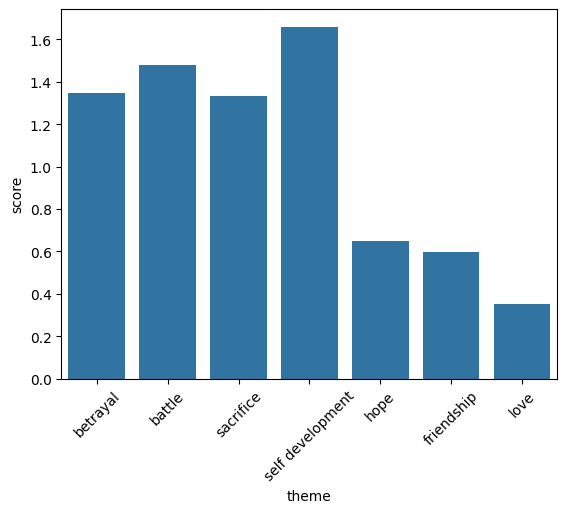

In [43]:
sns.barplot(data=theme_output, x="theme", y="score")
plt.xticks(rotation=45)
plt.show()

#Run Python Script

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available


True


In [ ]:
!cd /content/drive/MyDrive/Colab\ Notebooks/TVSeriesAnalysisSystem/ && python gradio_app.py

2024-09-29 07:51:00.925890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 07:51:00.946715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 07:51:00.952719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 07:51:00.967197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-29 07:51:02.160820: W tensorflow/compiler/tf2